#### __***TCAV Image***__

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Dense, Conv2D, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
def build_cnn():
    x = inputs = Input(shape=(64, 64, 3))
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(32, (3, 3), activation='relu', name='target_layer')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    return Model(inputs, Dense(10, activation='softmax')(x))

In [3]:
model = build_cnn()
intermediate_model = Model(inputs=model.input, outputs=model.get_layer('target_layer').output)

In [4]:
def load_images(folder):
    return np.array([
        img_to_array(load_img(os.path.join(folder, f), target_size=(64, 64))) / 255.0
        for f in os.listdir(folder)
    ])

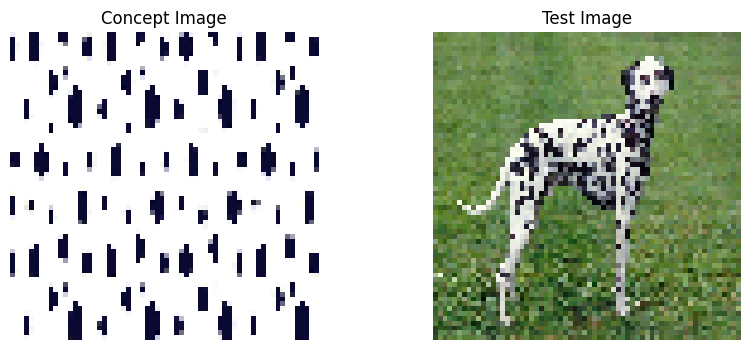

In [5]:
con_imgs = load_images('data/TCAV/dots')
rand_imgs = load_images('data/TCAV/concrete')
test_image = img_to_array(load_img('data/TCAV/dalmation.png', target_size=(64, 64))) / 255.0

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.imshow(con_imgs[0])
plt.title("Concept Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(test_image)
plt.title("Test Image")
plt.axis('off')
plt.show()

In [6]:
activations_concept = intermediate_model.predict(con_imgs)
activations_random = intermediate_model.predict(rand_imgs)

X = np.vstack([
    activations_concept.reshape(len(activations_concept), -1),
    activations_random.reshape(len(activations_random), -1)
])

y = np.array([1] * len(activations_concept) + [0] * len(activations_random))
cav = SGDClassifier().fit(X, y).coef_

sample_act = intermediate_model.predict(test_image[np.newaxis, ...]).reshape(-1)
directional_derivative = np.dot(sample_act, cav.T)[0]
tcav_score = (np.dot(activations_concept.reshape(len(activations_concept), -1), cav.T) > 0).mean()

print(f"Directional Derivative: {directional_derivative:.4f}")
print(f"TCAV Score: {tcav_score:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Directional Derivative: -510.7354
TCAV Score: 1.00
